In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as BS
from pandas.io.json import json_normalize
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium

from geopy.geocoders import Nominatim
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200614225529-0003
KERNEL_ID = 1dd80b3d-aa6c-45b2-92f5-d52f90bf5400
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, 'cc1a42e1-ef48-4d19-8bae-74b419dfb09c', 'p-b520fd3bb343ffe4deb23e648190e018ecef1fe8')
pc = project.project_context


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-c6b8b9d9-a22a-426a-963f-a67f25fc444c',
    'IBM_API_KEY_ID': 'MK6UMA5rfXOqpHlr5grKGE3X9Q-iCPtMVOutTEv0Nj3Z',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstonefinal-donotdelete-pr-sriwul9638okbh',
    'FILE': 'HoustonPopData.xlsx'
}


In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_03c06d15858143b7b21593a3c039aad5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MK6UMA5rfXOqpHlr5grKGE3X9Q-iCPtMVOutTEv0Nj3Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_03c06d15858143b7b21593a3c039aad5.get_object(Bucket='capstonefinal-donotdelete-pr-sriwul9638okbh',Key='HoustonPopData.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()


#  Zip Code        Lat       Long   Long-neg  CurrentPop  PopOld-10  \
0  1     77046  29.733084  95.430659 -95.430659         471        254   
1  2     77081  29.712099  95.480935 -95.480935       49691      25839   
2  3     77036  29.699048  95.536507 -95.536507       76146      44926   
3  4     77006  29.741003  95.391271 -95.391271       18875       9815   
4  5     77057  29.744068  95.489210 -95.489210       35491      20940   

   PopChange  
0        217  
1      23852  
2      31220  
3       9060  
4      14551

In [6]:
CLIENT_ID = '3JLQYEZTJXXGB5EUG1DDO1N05ALTLHLBRYB5CC1BRU52O4JP'
CLIENT_SECRET = 'DTWASEFZJTBO0SALVXCRHW5GAY04GKP42SXGMJSDMUKQTYF4'
VERSION = '20180605'

In [7]:
address = "Houston, TX"

geolocator = Nominatim(user_agent="Houston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Houston {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Houston 29.7589382, -95.3676974.


In [8]:
map_Houston = folium.Map(location=[latitude, longitude], zoom_start=10)
#map_Houston

In [9]:
for lat, lng, zipc, pop, in zip(
        df['Lat'], 
        df['Long-neg'], 
        df['Zip Code'], 
        df['CurrentPop']):
    label = '{}, {}'.format(zipc, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_Houston)  

#map_Houston

In [10]:
Zip = df.loc[0, 'Zip Code']
print(f"The first zip name is '{Zip}'.")

The first zip name is '77046'.


In [11]:
zip_lat = df.loc[0, 'Lat'] # neighborhood latitude value
zip_long = df.loc[0, 'Long'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(Zip, 
                                                               zip_lat, 
                                                               zip_long))

Latitude and longitude values of 77046 are 29.733084, 95.430659.


In [12]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    zip_lat, 
    zip_long, 
    radius, 
    LIMIT)
results = requests.get(url).json()
#results

In [13]:
import urllib.request, json 
with urllib.request.urlopen(" https://opendata.arcgis.com/datasets/f392021d9d2344938b0958909d690cc7_0.geojson") as url:
#with urllib.request.urlopen("https://services.arcgis.com/NummVBqZSIJKUeVR/arcgis/rest/services/Zip_Codes/FeatureServer/0/query?outFields=*&where=1%3D1") as url:


    data = json.loads(url.read().decode())
# print(data)

In [14]:
map_Houston.choropleth(
    geo_data=data,
    data=df,
    columns=['Zip Code', 'CurrentPop'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.9,
    legend_name='Pop'
)  

#map_Houston

/home/spark/shared/conda/envs/python3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [15]:
#Current Population

map_Houston_change = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Houston_change.choropleth(
    geo_data=data,
    data=df,
    columns=['Zip Code', 'CurrentPop'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.9,
    legend_name='Pop'
)  

for lat, lng, zipc, pop, in zip(
        df['Lat'], 
        df['Long-neg'], 
        df['Zip Code'], 
        df['CurrentPop']):
    label = '{}, {}'.format(zipc, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_Houston)  

map_Houston

/home/spark/shared/conda/envs/python3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [16]:
#old Population - 10 years ago
map_Houston_old = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Houston_old.choropleth(
    geo_data=data,
    data=df,
    columns=['Zip Code', 'CurrentPop'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.9,
    legend_name='Pop'
)  


for lat, lng, zipc, pop, in zip(
        df['Lat'], 
        df['Long-neg'], 
        df['Zip Code'], 
        df['PopOld-10']):
    label = '{}, {}'.format(zipc, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_Houston_old)  

map_Houston_old

/home/spark/shared/conda/envs/python3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [17]:
#Population change

map_Houston_change = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Houston_change.choropleth(
    geo_data=data,
    data=df,
    columns=['Zip Code', 'PopChange'],
    key_on='feature.properties.ZIP_CODE',
    fill_color='YlOrRd', 
    fill_opacity=0.6, 
    line_opacity=0.9,
    legend_name='Pop'
)  


for lat, lng, zipc, pop, in zip(
        df['Lat'], 
        df['Long-neg'], 
        df['Zip Code'], 
        df['PopChange']):
    label = '{}, {}'.format(zipc, pop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_Houston_change)  

map_Houston_change

/home/spark/shared/conda/envs/python3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [18]:
df.head(1)

#  Zip Code        Lat       Long   Long-neg  CurrentPop  PopOld-10  \
0  1     77046  29.733084  95.430659 -95.430659         471        254   

   PopChange  
0        217

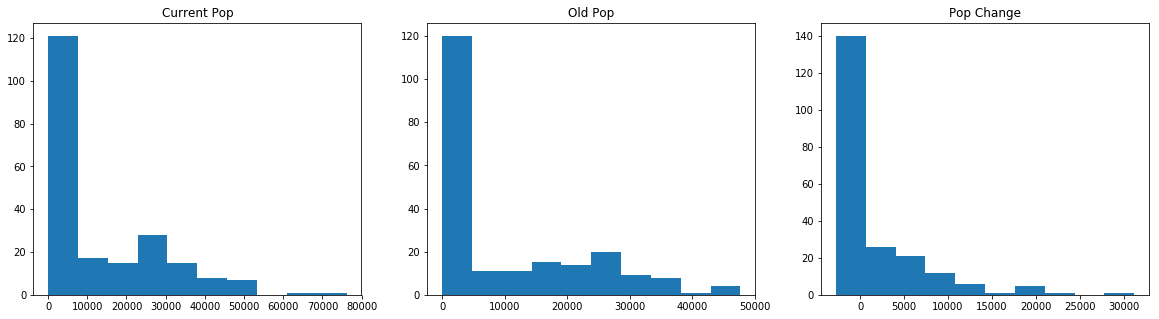

In [19]:
x=df['CurrentPop']
y=df['PopOld-10']
z=df['PopChange']
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3,figsize=(20, 5))

ax1.hist(x,bins = 10)
ax2.hist(y,bins = 10)
ax3.hist(z,bins = 10)

ax1.title.set_text('Current Pop')
ax2.title.set_text('Old Pop')
ax3.title.set_text('Pop Change')

In [20]:
df.describe()

#      Zip Code         Lat        Long    Long-neg  \
count  213.000000    213.000000  213.000000  213.000000  213.000000   
mean   107.000000  77280.816901   13.420138   43.003848  -43.003848   
std     61.631972    223.497202   14.850524   47.586881   47.586881   
min      1.000000  77002.000000    0.000000    0.000000  -95.681292   
25%     54.000000  77056.000000    0.000000    0.000000  -95.404429   
50%    107.000000  77345.000000    0.000000    0.000000    0.000000   
75%    160.000000  77489.000000   29.744068   95.404429    0.000000   
max    213.000000  77880.000000   30.008830   95.681292    0.000000   

         CurrentPop     PopOld-10     PopChange  
count    213.000000    213.000000    213.000000  
mean   12070.845070   9747.835681   2323.009390  
std    16082.867402  12874.361592   4913.436185  
min        0.000000      0.000000  -2764.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%    24470.000000  20940.000000   2898.000000  
max    76146.000000  47739.000000  31220.000000

In [22]:
CurrentPop = x.sum()
PopOld = y.sum()
PopChange = z.sum()
print ("CurrentPop", CurrentPop, "   PopOld", PopOld , "   PopChange", PopChange )

CurrentPop 2571090    PopOld 2076289    PopChange 494801
